
# Titanic Dataset — Exploratory Data Analysis (EDA)

Tasks:
- Inspect data types and missing values
- Clean/transform data (handle missing values, convert types, create features)
- Compute summary statistics and group-based insights (e.g., survival by gender and class)
- Visualize key patterns and correlations with **matplotlib** (no seaborn)
- Bonus: visualize survival rates with bar plots and a correlation heatmap





## 1. Setup
Import libraries and load the dataset.


In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## 2. Data Types & Missing Data
Check column types and missing values. This helps decide cleaning/imputation steps.


In [5]:

print("Data types:")
print(df.dtypes)



Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
print("\nMissing values per column:")
print(df.isna().sum())



Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



## 3. Data Cleaning & Type Conversion
- **Embarked**: fill missing with mode
- **Age**: fill missing with median
- **Fare**: fill missing with median (if any)
- **Cabin** -> `Deck` (first letter), missing => "Unknown"
- Convert `Pclass`, `Sex`, `Embarked`, `Deck` to `category`
- Add `FamilySize` and `IsAlone`


In [7]:

df_clean = df.copy()

if df_clean["Embarked"].isna().any():
    df_clean["Embarked"] = df_clean["Embarked"].fillna(df_clean["Embarked"].mode(dropna=True)[0])

if df_clean["Age"].isna().any():
    df_clean["Age"] = df_clean["Age"].fillna(df_clean["Age"].median())

if df_clean["Fare"].isna().any():
    df_clean["Fare"] = df_clean["Fare"].fillna(df_clean["Fare"].median())

def extract_deck(cabin):
    if isinstance(cabin, str) and len(cabin) > 0:
        return cabin[0]
    return "Unknown"

df_clean["Deck"] = df_clean["Cabin"].apply(extract_deck)

for c in ["Pclass", "Sex", "Embarked", "Deck"]:
    df_clean[c] = df_clean[c].astype("category")

df_clean["FamilySize"] = df_clean["SibSp"] + df_clean["Parch"] + 1
df_clean["IsAlone"] = (df_clean["FamilySize"] == 1).astype(int)

print("Missing values after cleaning:")
print(df_clean.isna().sum())

df_clean.head()


Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Deck             0
FamilySize       0
IsAlone          0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Unknown,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Unknown,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Unknown,1,1



## 4. Summary Statistics & Group-Based Insights


In [12]:

overall_survival_rate = df_clean["Survived"].mean()
print(f"Overall survival rate: {overall_survival_rate:.3f}")


Overall survival rate: 0.384


In [8]:
survival_by_sex = df_clean.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
print("\nSurvival by Sex:")
print(survival_by_sex)



Survival by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_12696\1978071788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_sex = df_clean.groupby("Sex")["Survived"].mean().sort_values(ascending=False)


In [9]:
survival_by_pclass = df_clean.groupby("Pclass")["Survived"].mean().sort_index()
print("\nSurvival by Pclass:")
print(survival_by_pclass)


Survival by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_12696\3087970562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_pclass = df_clean.groupby("Pclass")["Survived"].mean().sort_index()


In [10]:
survival_by_embarked = df_clean.groupby("Embarked")["Survived"].mean().sort_values(ascending=False)
print("\nSurvival by Embarked:")
print(survival_by_embarked)


Survival by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_12696\244923807.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_embarked = df_clean.groupby("Embarked")["Survived"].mean().sort_values(ascending=False)


In [11]:
survival_pclass_sex = df_clean.pivot_table(values="Survived", index="Pclass", columns="Sex", aggfunc="mean")
print("\nSurvival by Pclass and Sex:")
print(survival_pclass_sex)


Survival by Pclass and Sex:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


C:\Users\HP\AppData\Local\Temp\ipykernel_12696\4168717483.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_pclass_sex = df_clean.pivot_table(values="Survived", index="Pclass", columns="Sex", aggfunc="mean")


In [15]:
df_clean["FamilySizeBin"] = pd.cut(df_clean["FamilySize"], bins=[0,1,2,4,7,11], labels=["1","2","3-4","5-7","8-11"], include_lowest=True)
survival_by_isalone = df_clean.groupby("IsAlone")["Survived"].mean()
survival_by_famsize = df_clean.groupby("FamilySizeBin")["Survived"].mean()

print("\nSurvival by IsAlone:")
print(survival_by_isalone)
print("\nSurvival by FamilySizeBin:")
print(survival_by_famsize)


Survival by IsAlone:
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

Survival by FamilySizeBin:
FamilySizeBin
1       0.303538
2       0.552795
3-4     0.610687
5-7     0.204082
8-11    0.000000
Name: Survived, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_12696\2511742670.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_famsize = df_clean.groupby("FamilySizeBin")["Survived"].mean()


In [16]:
#Displaying all above
display(survival_by_sex.to_frame("SurvivalRate"))
display(survival_by_pclass.to_frame("SurvivalRate"))
display(survival_by_embarked.to_frame("SurvivalRate"))
display(survival_pclass_sex)
display(survival_by_isalone.to_frame("SurvivalRate"))
display(survival_by_famsize.to_frame("SurvivalRate"))

,SurvivalRate
Sex,
female,0.742038
male,0.188908


,SurvivalRate
Pclass,
1,0.629630
2,0.472826
3,0.242363


,SurvivalRate
Embarked,
C,0.553571
Q,0.389610
S,0.339009


Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


,SurvivalRate
IsAlone,
0,0.505650
1,0.303538


,SurvivalRate
FamilySizeBin,
1,0.303538
2,0.552795
3-4,0.610687
5-7,0.204082
8-11,0.000000



## 5. Visualizations (Matplotlib)
One chart per figure, no seaborn, no custom color settings.



### 5.1 Survival by Sex — Bar Plot


C:\Users\HP\AppData\Local\Temp\ipykernel_12696\217974301.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df_clean.groupby("Sex")["Survived"].mean().sort_values(ascending=False)


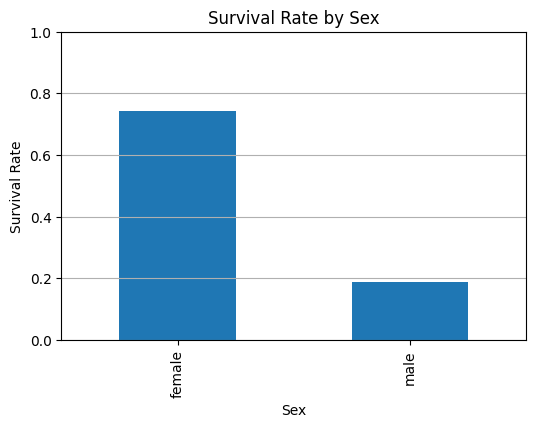

In [17]:

rates = df_clean.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
rates.plot(kind="bar")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.ylim(0,1)
plt.grid(axis="y")
plt.show()



### 5.2 Survival by Pclass — Bar Plot


C:\Users\HP\AppData\Local\Temp\ipykernel_12696\1172600807.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df_clean.groupby("Pclass")["Survived"].mean().sort_index()


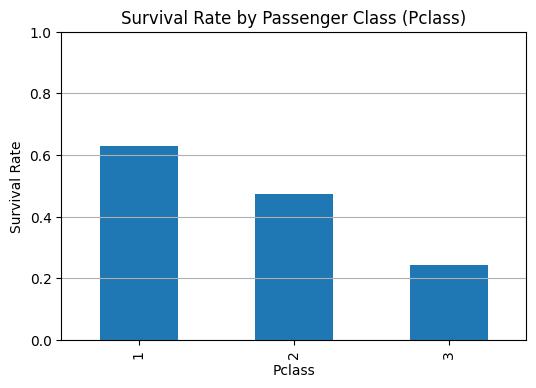

In [18]:

rates = df_clean.groupby("Pclass")["Survived"].mean().sort_index()
plt.figure(figsize=(6,4))
rates.plot(kind="bar")
plt.title("Survival Rate by Passenger Class (Pclass)")
plt.ylabel("Survival Rate")
plt.xlabel("Pclass")
plt.ylim(0,1)
plt.grid(axis="y")
plt.show()



### 5.3 Survival by Pclass and Sex — Grouped Bars


C:\Users\HP\AppData\Local\Temp\ipykernel_12696\3533996194.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_rates = df_clean.pivot_table(values="Survived", index="Pclass", columns="Sex", aggfunc="mean").sort_index()


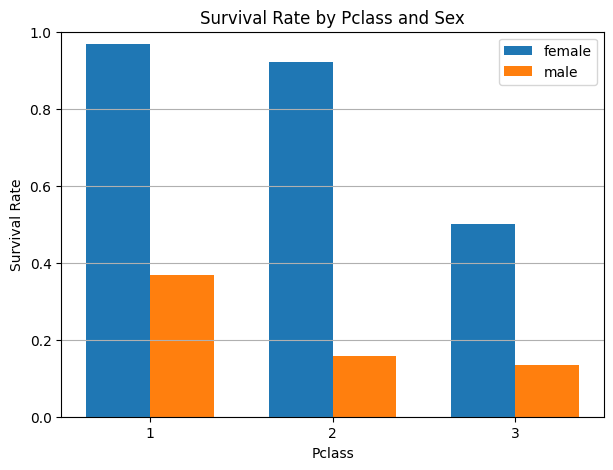

In [19]:

pivot_rates = df_clean.pivot_table(values="Survived", index="Pclass", columns="Sex", aggfunc="mean").sort_index()
plt.figure(figsize=(7,5))
import numpy as np
x = np.arange(len(pivot_rates.index))
width = 0.35
plt.bar(x - width/2, pivot_rates["female"].values, width, label="female")
plt.bar(x + width/2, pivot_rates["male"].values, width, label="male")
plt.xticks(x, pivot_rates.index.astype(str))
plt.title("Survival Rate by Pclass and Sex")
plt.ylabel("Survival Rate")
plt.xlabel("Pclass")
plt.ylim(0,1)
plt.legend()
plt.grid(axis="y")
plt.show()



### 5.4 Survival by Embarked — Bar Plot


C:\Users\HP\AppData\Local\Temp\ipykernel_12696\2683702824.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df_clean.groupby("Embarked")["Survived"].mean().sort_values(ascending=False)


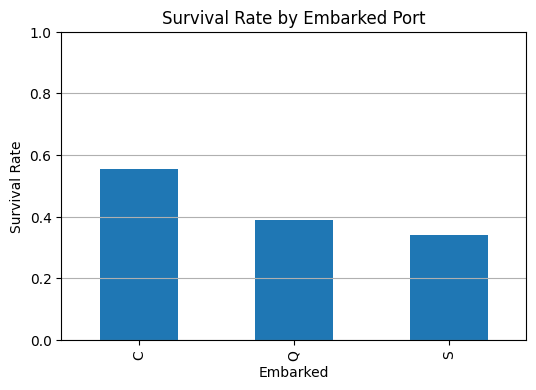

In [20]:

rates = df_clean.groupby("Embarked")["Survived"].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
rates.plot(kind="bar")
plt.title("Survival Rate by Embarked Port")
plt.ylabel("Survival Rate")
plt.xlabel("Embarked")
plt.ylim(0,1)
plt.grid(axis="y")
plt.show()



### 5.5 Correlation Heatmap (Numeric Features)


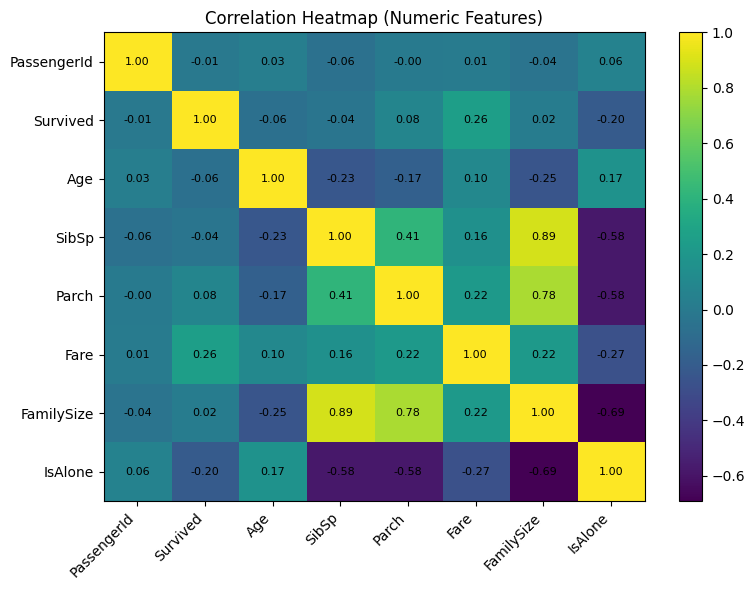

In [21]:

import numpy as np
numeric_df = df_clean.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation="nearest", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap (Numeric Features)")

for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        val = corr.iloc[i, j]
        plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()



## 6. Key Takeaways
- Females show a higher survival rate than males
- First class passengers had higher survival
- Being alone is associated with lower survival
- Numeric features show expected relationships (e.g., Fare relates to Pclass)




